In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
from pandas_profiling import ProfileReport
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/migros-datathon-coderspace/customeraccount.csv
/kaggle/input/migros-datathon-coderspace/sample_submission.csv
/kaggle/input/migros-datathon-coderspace/transaction_header.csv
/kaggle/input/migros-datathon-coderspace/genel_kategoriler.csv
/kaggle/input/migros-datathon-coderspace/customer.csv
/kaggle/input/migros-datathon-coderspace/train.csv
/kaggle/input/migros-datathon-coderspace/test.csv
/kaggle/input/migros-datathon-coderspace/product_groups.csv
/kaggle/input/migros-datathon-coderspace/transaction_sale/transaction_sale.csv


In [2]:
import pandas as pd 
from termcolor import colored
from pandas_profiling import ProfileReport
import missingno as msno
%matplotlib inline
import seaborn as sns
import numpy as np

## Transaction Sale
##### ● basketid: Ürünün içerisinde geçtiği fişin numarası
##### ● category_level_1: 1. Seviye Kategori (Kategori hiyerarşisinin en üst seviyesi)
##### ● category_level_2: 2. Seviye Kategori
##### ● category_level_3: 3. Seviye Kategori
##### ● category_level_4: 4. Seviye Kategori (Kategori hiyerarşisinin en alt seviyesi)
##### ● amount: Ürün tutarı
##### ● quantity: Birim olarak satılan ürünlerde ürün sayısı, ağırlığı tartılarak satılan ürünlerde ürünün ağırlığı
##### ● discount_type_1: Birinci tip indirimin yüzdesi
##### ● discount_type_2: İkinci tip indirimin yüzdesi
##### ● discount_type_3: Üçüncü tip indirimin yüzdesi

In [3]:
#Fişlerin içerisindeki ürünlerin bilgileri
transaction_sale=pd.read_csv("/kaggle/input/migros-datathon-coderspace/transaction_sale/transaction_sale.csv")

In [4]:
print(f'İşlem satış verilerindeki satır sayısı: {transaction_sale.shape[0]}')
print(f'İşlem satış verilerindeki sütun sayısı: {transaction_sale.shape[1]}')
print(f'İşlem satış verilerindeki değer sayısı: {transaction_sale.count().sum()}')
print(f'İşlem satış verilerindeki eksik değerlerin sayısı: {sum(transaction_sale.isna().sum())}')
transaction_sale.head()

İşlem satış verilerindeki satır sayısı: 6537881
İşlem satış verilerindeki sütun sayısı: 10
İşlem satış verilerindeki değer sayısı: 60729679
İşlem satış verilerindeki eksik değerlerin sayısı: 4649131


,basketid,category_level_1,category_level_2,category_level_3,category_level_4,amount,quantity,discount_type_1,discount_type_2,discount_type_3
0,20120706070177471,613,50,50,15,19.9,2.0,NaN,0.0,0.0
1,20120706070177471,425,30,12,10,3.5,1.0,NaN,0.0,0.0
2,20120706070177471,425,30,12,11,7.9,1.0,NaN,0.0,0.0
3,20122703940031323,103,25,15,10,7.9,2.0,NaN,0.0,0.0
4,20122703940031323,101,15,15,15,16.0,1.0,NaN,0.0,0.0


In [5]:
transaction_sale.nunique().reset_index().rename(columns={'index':'column',0:'nunique_count'})

,column,nunique_count
0,basketid,1124327
1,category_level_1,70
2,category_level_2,40
3,category_level_3,40
4,category_level_4,85
5,amount,24700
6,quantity,8380
7,discount_type_1,1557194
8,discount_type_2,5887
9,discount_type_3,6863


In [6]:
#transaction_sale_profile = ProfileReport(transaction_sale, title="transaction_sale")
#transaction_sale_profile.to_notebook_iframe()

## Customer
##### ● individualnumber
##### ● gender: Müşterinin cinsiyeti
##### ● city code: Müşterinin il kodu
##### ● dateofbirth: Müşterinin doğum yılı

In [7]:
# Müşterilerin demografik bilgileri
customer=pd.read_csv("/kaggle/input/migros-datathon-coderspace/customer.csv")

In [8]:
print(f'Müşteri verilerindeki satır sayısı: {customer.shape[0]}')
print(f'Müşteri verilerindeki sütun sayısı: {customer.shape[1]}')
print(f'Müşteri verilerindeki değer sayısı: {customer.count().sum()}')
print(f'Müşteri verilerindeki eksik değerlerin sayısı: {sum(customer.isna().sum())}')
customer.head()

Müşteri verilerindeki satır sayısı: 28593
Müşteri verilerindeki sütun sayısı: 4
Müşteri verilerindeki değer sayısı: 107645
Müşteri verilerindeki eksik değerlerin sayısı: 6727


,individualnumber,gender,city_code,dateofbirth
0,94212124,K,NaN,1946.0
1,96387515,E,34.0,1974.0
2,95040383,E,80.0,1980.0
3,94694434,E,NaN,1970.0
4,47648671,E,35.0,1963.0


In [9]:
customer.nunique().reset_index().rename(columns={'index':'column',0:'nunique_count'})

,column,nunique_count
0,individualnumber,28593
1,gender,2
2,city_code,82
3,dateofbirth,87


## Customer Account

##### ● individualnumber: Promotion train/test tablosundaki individualnumber ile eşleşir.
##### ● cardnumber: Transaction header tablosundaki customer_number ile eşleşir.

In [10]:
#cardnumber-individualnumber eşleşmesi
customer_account=pd.read_csv("/kaggle/input/migros-datathon-coderspace/customeraccount.csv")

In [11]:
customer_account.nunique().reset_index().rename(columns={'index':'column',0:'nunique_count'})

,column,nunique_count
0,individualnumber,28593
1,cardnumber,35159


In [12]:
#customer_account_profile = ProfileReport(customer_account, title="customer_account")
#customer_account_profile.to_notebook_iframe()

## Promotion Train/Test
##### ● individualnumber: Müşterinin kişi numarası

##### ● category_number: Kampanyanın çıkıldığı kampanya kategorisi.

##### ● hakkedis_amt: Kampanyadan yararlanabilmek için belirtilen kategoride yapılması gereken minimum harcama tutarı (TL)

##### ● odul_amt: Kampanyadan yararlanıldığında elde edilecek ödül puan miktarı

##### ● response: Müşterinin kampanyadan yararlanma durumu (1: Yararlandı, 0: Yararlanmadı) LABEL KOLONU

In [13]:
test=pd.read_csv("/kaggle/input/migros-datathon-coderspace/test.csv")
train=pd.read_csv("/kaggle/input/migros-datathon-coderspace/train.csv")

In [14]:
print(f'Train verilerindeki satır sayısı: {train.shape[0]}')
print(f'Train verilerindeki sütun sayısı: {train.shape[1]}')
print(f'Train verilerindeki değer sayısı: {train.count().sum()}')
print(f'Train verilerinde eksik değerlere sahip satır sayısı: {sum(train.isna().sum())}')
train.head()
print("----------------------------------------------------------------------------------------------")
print(f'Test verilerindeki satır sayısı: {test.shape[0]}')
print(f'Test verilerindeki sütun sayısı: {test.shape[1]}')
print(f'Test verilerindeki değer sayısı: {test.count().sum()}')
print(f'Test verilerinde eksik değerlere sahip satır sayısı: {sum(test.isna().sum())}')
test.head()

Train verilerindeki satır sayısı: 13115
Train verilerindeki sütun sayısı: 5
Train verilerindeki değer sayısı: 65575
Train verilerinde eksik değerlere sahip satır sayısı: 0
----------------------------------------------------------------------------------------------
Test verilerindeki satır sayısı: 13236
Test verilerindeki sütun sayısı: 4
Test verilerindeki değer sayısı: 52944
Test verilerinde eksik değerlere sahip satır sayısı: 0


,individualnumber,category_number,hakkedis_amt,odul_amt
0,95812936,9029,38.0,3.0
1,23929570,9012,28.0,2.0
2,95948115,9019,21.0,2.0
3,100898513,9035,48.0,4.0
4,12769156,9015,26.0,3.0


In [15]:
train.nunique().reset_index().rename(columns={'index':'column',0:'nunique_count'})

,column,nunique_count
0,individualnumber,13115
1,category_number,49
2,hakkedis_amt,121
3,odul_amt,20
4,response,2


In [16]:
test.nunique().reset_index().rename(columns={'index':'column',0:'nunique_count'})

,column,nunique_count
0,individualnumber,13236
1,category_number,49
2,hakkedis_amt,118
3,odul_amt,20


In [17]:
#train_profile = ProfileReport(train, title="Train")
#train_profile.to_notebook_iframe()

In [18]:
#test_profile=ProfileReport(test,title="Test")
#test_profile.to_notebook_iframe()

## Transaction Header
##### ● date_of_transaction: Fiş tarihi
##### ● basketid: Fiş numarası
##### ● cardnumber: Alışverişte kullanılan kart numarası (customeraccount tablosundaki cardnumber ile eşleşmektedir)
##### ● is_sanal: Fişin karşılık geldiği alışverişin sanal olma durumu (1: Sanal Alışveriş, 0: Mağaza Alışverişi)



In [19]:
# Fiş bilgileri
transaction_header=pd.read_csv("/kaggle/input/migros-datathon-coderspace/transaction_header.csv")

In [20]:
print(f'İşlem başlığı verilerindeki satır sayısı: {transaction_header.shape[0]}')
print(f'İşlem başlığı verilerindeki sütun sayısı: {transaction_header.shape[1]}')
print(f'İşlem başlığı verilerindeki değer sayısı: {transaction_header.count().sum()}')
print(f'İşlem başlığı verilerindeki eksik değerlerin sayısı: {sum(transaction_header.isna().sum())}')
transaction_header.head()

İşlem başlığı verilerindeki satır sayısı: 1124673
İşlem başlığı verilerindeki sütun sayısı: 4
İşlem başlığı verilerindeki değer sayısı: 4498692
İşlem başlığı verilerindeki eksik değerlerin sayısı: 0


,date_of_transaction,cardnumber,basketid,is_sanal
0,2020-12-01,8487374630565615,20120163990041163,0
1,2020-12-01,4287574603569015,20120163990016137,0
2,2020-12-01,6487154648560315,20120160080017338,0
3,2020-12-01,3787564693563915,20120163570105022,0
4,2020-12-01,9087994683569715,20120162340016645,0


In [21]:
transaction_header.nunique().reset_index().rename(columns={'index':'column',0:'nunique_count'})

,column,nunique_count
0,date_of_transaction,366
1,cardnumber,30319
2,basketid,1124673
3,is_sanal,2


In [22]:
#transaction_header_profile = ProfileReport(transaction_header, title="transaction_header")
#transaction_header_profile.to_notebook_iframe()

## Product Groups
##### ● category_number: Kampanyalarda kullanılan kategori.
##### ● category_level_1: 1. Seviye Kategori (Kategori hiyerarşisinin en üst seviyesi)
##### ● category_level_2: 2. Seviye Kategori
##### ● category_level_3: 3. Seviye Kategori
##### ● category_level_4: 4. Seviye Kategori (Kategori hiyerarşisinin en alt seviyesi)

In [23]:
# Kampanya kategorilerinin denk geldiği kategori kırılımları
product_groups=pd.read_csv("/kaggle/input/migros-datathon-coderspace/product_groups.csv")

In [24]:
print(f'ürün grubu verilerindeki satır sayısı: {product_groups.shape[0]}')
print(f'Ürün grubu verilerindeki sütun sayısı: {product_groups.shape[1]}')
print(f'Ürün grubu verilerindeki değer sayısı: {product_groups.count().sum()}')
print(f'Ürün grubu verilerindeki eksik değerlerin sayısı: {sum(product_groups.isna().sum())}')
product_groups.head()

ürün grubu verilerindeki satır sayısı: 3913
Ürün grubu verilerindeki sütun sayısı: 5
Ürün grubu verilerindeki değer sayısı: 19565
Ürün grubu verilerindeki eksik değerlerin sayısı: 0


,category_number,category_level_1,category_level_2,category_level_3,category_level_4
0,9046,341,20,10,10
1,9009,125,25,10,10
2,9049,410,65,20,10
3,9019,300,10,19,11
4,9035,305,31,10,10


In [25]:
product_groups.nunique().reset_index().rename(columns={'index':'column',0:'nunique_count'})

,column,nunique_count
0,category_number,50
1,category_level_1,56
2,category_level_2,41
3,category_level_3,40
4,category_level_4,96


In [26]:
#product_groups_profile = ProfileReport(product_groups, title="product_groups")
#product_groups_profile.to_notebook_iframe()

In [27]:
# Genel kategori isimleri
genel_kategoriler=pd.read_csv(r'/kaggle/input/migros-datathon-coderspace/genel_kategoriler.csv')

In [28]:
print(f'Genel kategoriler satır sayısı: {genel_kategoriler.shape[0]}')
print(f'Genel kategoriler sütun sayısı: {genel_kategoriler.shape[1]}')
print(f'Genel kategorilerin değer sayısı: {genel_kategoriler.count().sum()}')
print(f'Genel kategorilerin eksik değer sayısı: {sum(genel_kategoriler.isna().sum())}')
genel_kategoriler.head()

Genel kategoriler satır sayısı: 50
Genel kategoriler sütun sayısı: 2
Genel kategorilerin değer sayısı: 100
Genel kategorilerin eksik değer sayısı: 0


,category_number,genel_kategori
0,9052,diger
1,9053,diger
2,9054,diger
3,9055,gida
4,9056,gida


In [29]:
genel_kategoriler.nunique().reset_index().rename(columns={'index':'column',0:'nunique_count'})

,column,nunique_count
0,category_number,50
1,genel_kategori,5


In [30]:
#genel_kategoriler_profile = ProfileReport(genel_kategoriler, title="genel_kategoriler")
#genel_kategoriler_profile.to_notebook_iframe()

## Eksik Değerler

In [31]:
def missing_values_table(df):
    
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Eksik Değerler ', 1 : 'Toplam Değerlerin Yüzdesi '})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Toplam Değerlerin Yüzdesi ', ascending=False).round(1)
        
        print ("Seçtiğiniz veri çerçevesinde " + str(df.shape[1]) + " sütunlar.\n"      
            "Burada " + str(mis_val_table_ren_columns.shape[0]) +
              " eksik değerlere sahip sütunlar.")
        
        return mis_val_table_ren_columns

In [32]:
print('\033[1m'+ 'Train'+'\033[0m')
train_missing = missing_values_table(train)
print('\033[1m'+ 'Test'+'\033[0m')
test_missing = missing_values_table(test)
print('\033[1m' + 'Transaction Header'+'\033[0m')
transaction_header_missing = missing_values_table(transaction_header)
print('\033[1m' + 'Transaction Sale'+'\033[0m')
transaction_sale_missing = missing_values_table(transaction_sale)
print('\033[1m' + 'Product Groups'+'\033[0m')
product_groups_missing = missing_values_table(product_groups)
print('\033[1m' + 'Customer Account'+'\033[0m')
customer_account_missing = missing_values_table(customer_account)
print('\033[1m' + 'Customer'+'\033[0m')
customer_missing = missing_values_table(customer)
print('\033[1m' + 'genel Kategoriler'+'\033[0m')
genel_kategoriler_missing = missing_values_table(genel_kategoriler)

Train
Seçtiğiniz veri çerçevesinde 5 sütunlar.
Burada 0 eksik değerlere sahip sütunlar.
Test
Seçtiğiniz veri çerçevesinde 4 sütunlar.
Burada 0 eksik değerlere sahip sütunlar.
Transaction Header
Seçtiğiniz veri çerçevesinde 4 sütunlar.
Burada 0 eksik değerlere sahip sütunlar.
Transaction Sale
Seçtiğiniz veri çerçevesinde 10 sütunlar.
Burada 3 eksik değerlere sahip sütunlar.
Product Groups
Seçtiğiniz veri çerçevesinde 5 sütunlar.
Burada 0 eksik değerlere sahip sütunlar.
Customer Account
Seçtiğiniz veri çerçevesinde 2 sütunlar.
Burada 0 eksik değerlere sahip sütunlar.
Customer
Seçtiğiniz veri çerçevesinde 4 sütunlar.
Burada 3 eksik değerlere sahip sütunlar.
genel Kategoriler
Seçtiğiniz veri çerçevesinde 2 sütunlar.
Burada 0 eksik değerlere sahip sütunlar.


## transaction_sale veri setinin eksik verisini inceleme

#### Bar Grafik

<AxesSubplot:>

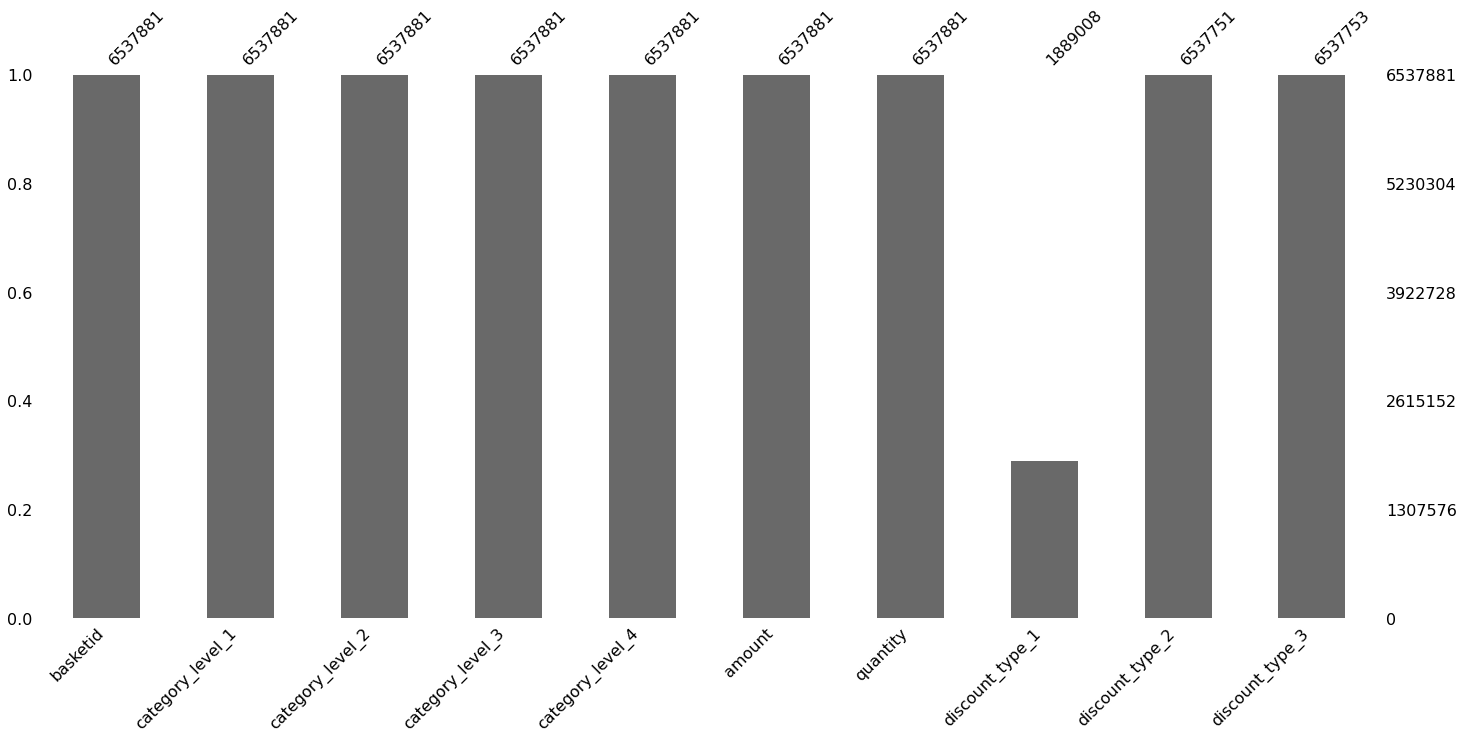

In [33]:
msno.bar(transaction_sale)

### Matrix Grafik

<AxesSubplot:>

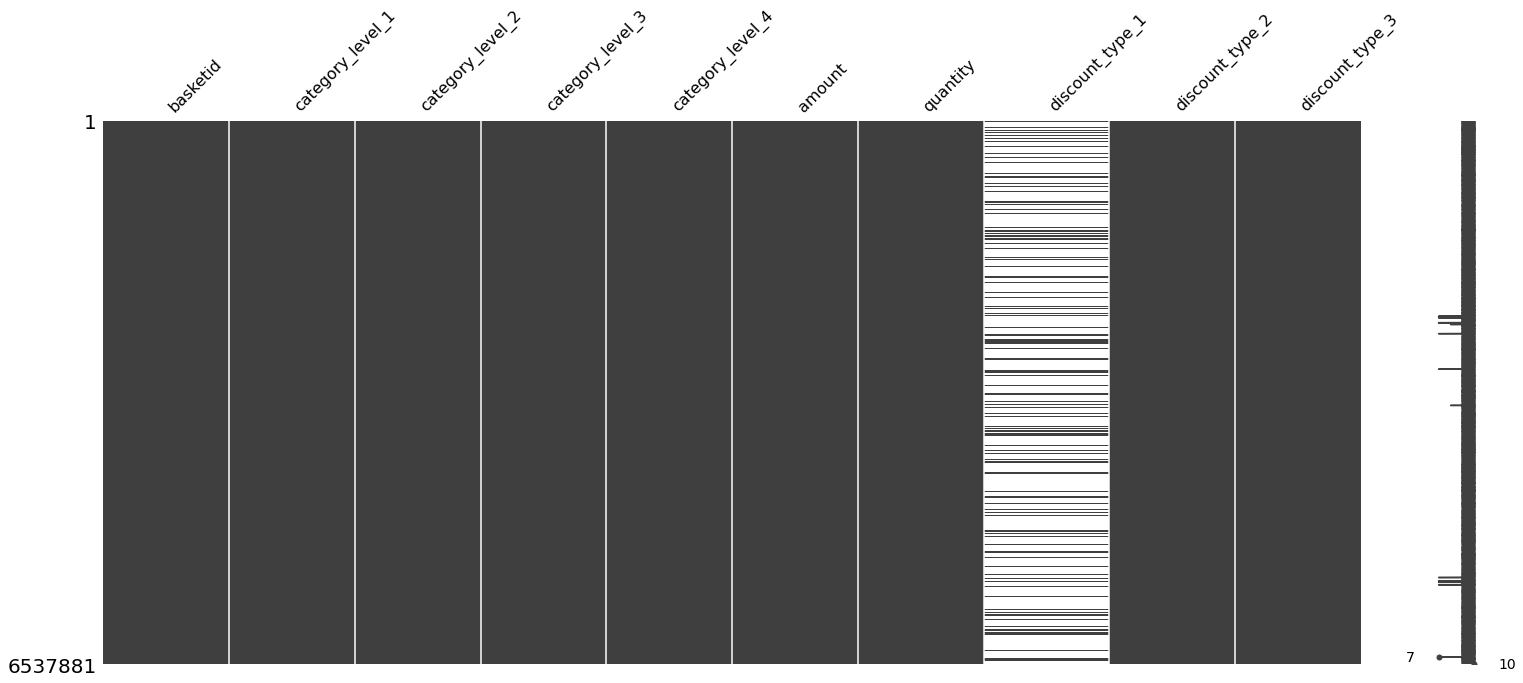

In [34]:
msno.matrix(transaction_sale)

In [35]:
transaction_sale.isnull().sum()

basketid                  0
category_level_1          0
category_level_2          0
category_level_3          0
category_level_4          0
amount                    0
quantity                  0
discount_type_1     4648873
discount_type_2         130
discount_type_3         128
dtype: int64

In [36]:
cm = sns.light_palette("red", as_cmap=True)

In [37]:
transaction_sale_missing.style.background_gradient(cmap=cm)

,Eksik Değerler,Toplam Değerlerin Yüzdesi
discount_type_1,4648873,71.100000
discount_type_2,130,0.000000
discount_type_3,128,0.000000


In [38]:
from sklearn.neighbors import LocalOutlierFactor

In [39]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [40]:
clf.fit_predict(transaction_sale_missing)

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_lof.py:288: UserWarning: n_neighbors (20) is greater than the total number of samples (3). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples)


array([ 1, -1,  1])

In [41]:
transaction_sale_missing_scores = clf.negative_outlier_factor_

In [42]:
transaction_sale=transaction_sale_missing_scores

In [43]:
transaction_sale

array([-0.99999989, -1.00000022, -0.99999989])

In [44]:
transaction_sale_missing.isnull().sum()

Eksik Değerler                0
Toplam Değerlerin Yüzdesi     0
dtype: int64

## Customer veri setinin eksik verisini inceleme

### Bar

<AxesSubplot:>

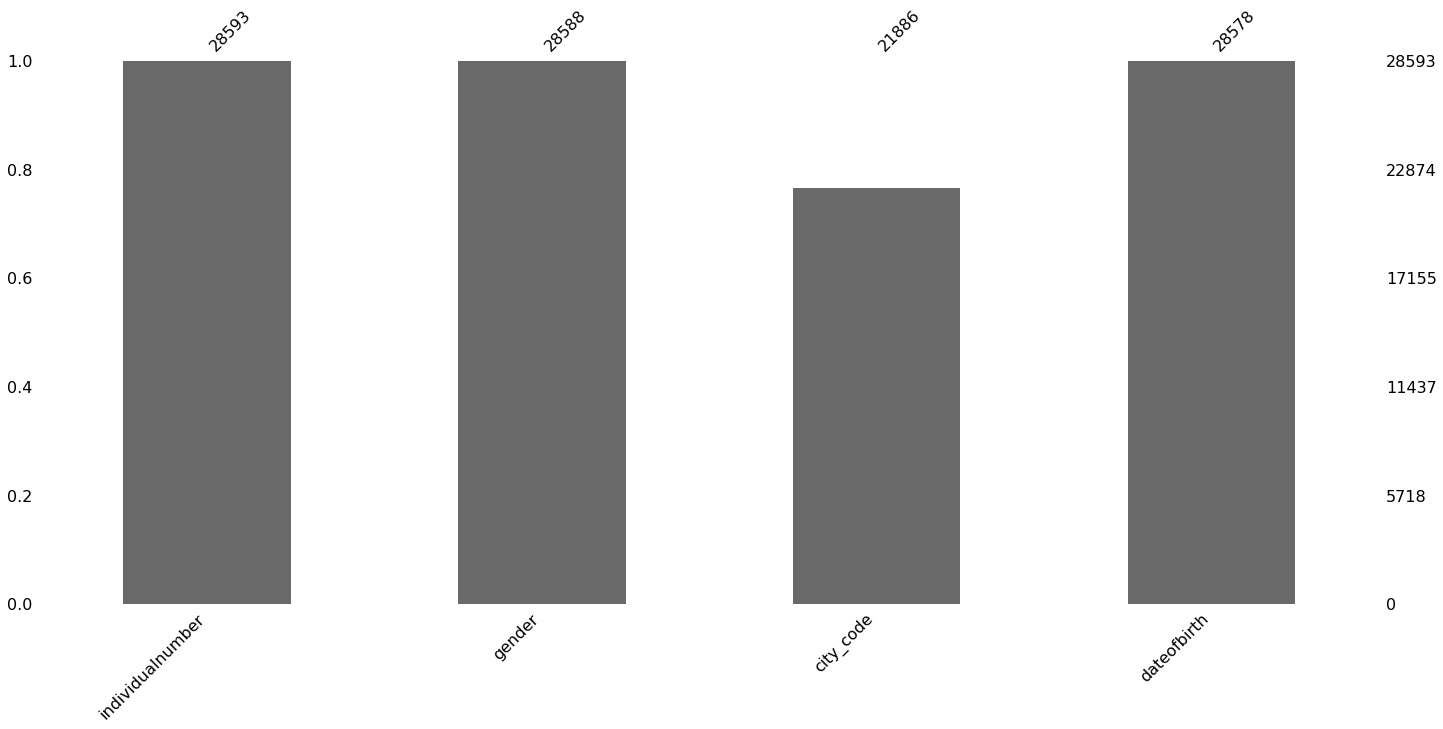

In [45]:
msno.bar(customer)

### Matrix Grafik

<AxesSubplot:>

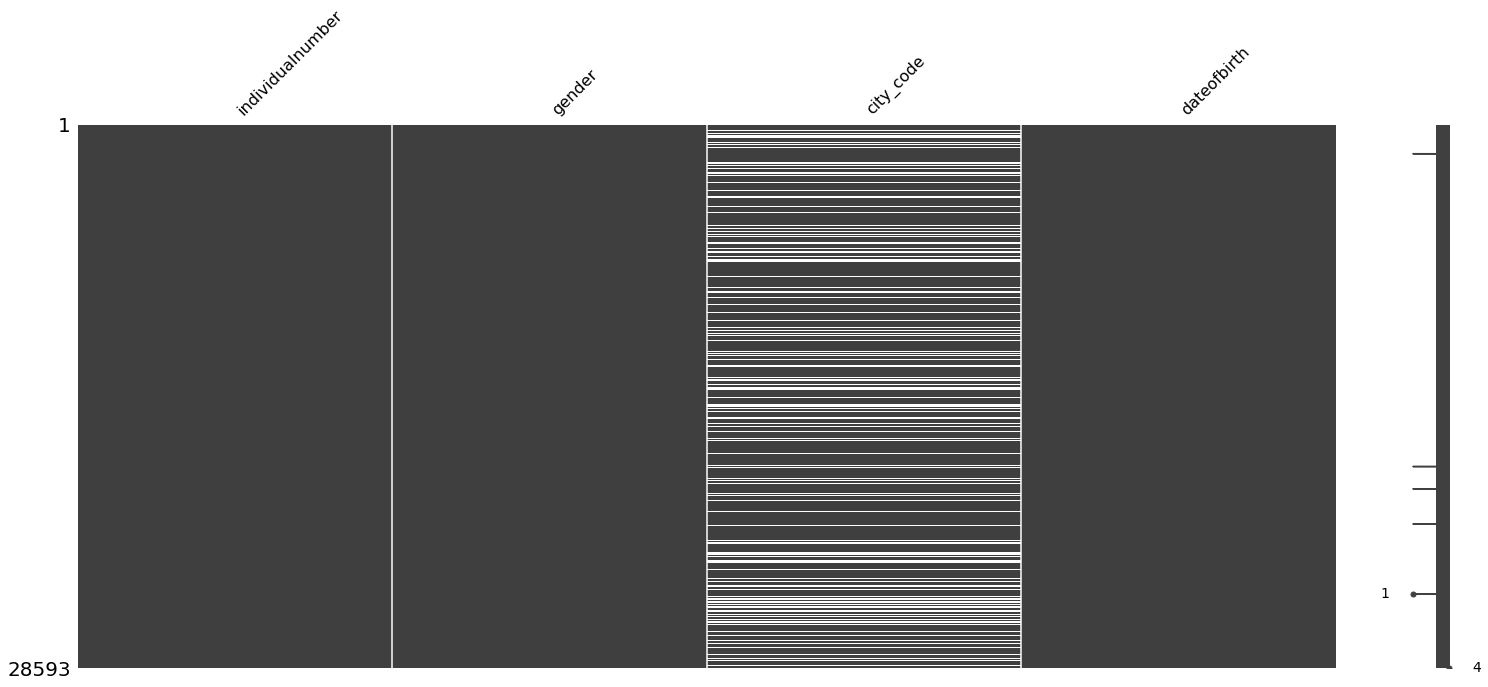

In [46]:
msno.matrix(customer)

In [47]:
customer.isnull().sum()

individualnumber       0
gender                 5
city_code           6707
dateofbirth           15
dtype: int64

In [48]:
customer_missing.style.background_gradient(cmap=cm)

,Eksik Değerler,Toplam Değerlerin Yüzdesi
city_code,6707,23.500000
dateofbirth,15,0.100000
gender,5,0.000000


In [49]:
customer_missing.isnull().sum()

Eksik Değerler                0
Toplam Değerlerin Yüzdesi     0
dtype: int64

# 1. Modelleme

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [87]:
X_train=train[transaction_header]
y_train= train['response']

ValueError: Boolean array expected for the condition, not int64

In [86]:
X_train, X_test, y_train, y_test = train_test_split(train, train['response'], test_size=0.20)

,category_number,hakkedis_amt,odul_amt,gender,city_code,dateofbirth,amount_mean,amount_max,amount_min,amount_sum,amount_median,quantity_mean,quantity_max,quantity_min,quantity_sum,quantity_median,discount_type_1_mean,discount_type_1_sum,discount_type_1_size,discount_type_2_mean,discount_type_2_sum,discount_type_2_size,discount_type_3_mean,discount_type_3_sum,discount_type_3_size,category_level_1_nunique,category_level_2_nunique,category_level_3_nunique,category_level_4_nunique,is_sanal_mean,is_sanal_size,cardnumber_nunique,basketid_nunique,date_of_transaction_nunique
0,9000,21.0,2.0,E,7.0,1983.0,15.746921,149.90,0.00,6188.54,9.900,1.188318,7.755,0.000,467.009,1.0,1.492886,47.772341,393.0,0.439873,172.87,393.0,0.561858,220.81,393.0,39.0,18.0,20.0,25.0,0.015625,64.0,1.0,64.0,59.0
1,9000,17.0,1.0,E,19.0,1951.0,48.961884,2899.90,0.00,6756.74,12.110,1.372442,5.000,0.000,189.397,1.0,4.326250,103.830001,138.0,4.487246,619.24,138.0,9.410942,1298.71,138.0,25.0,16.0,13.0,20.0,0.000000,30.0,1.0,30.0,30.0
2,9058,24.0,3.0,K,35.0,1982.0,14.442136,1999.00,0.00,24681.61,4.500,1.387909,10.000,0.000,2371.936,1.0,1.565704,1825.610969,1709.0,0.582592,995.65,1709.0,1.491978,2549.79,1709.0,40.0,19.0,18.0,30.0,0.013514,518.0,1.0,518.0,268.0
4,9001,38.0,3.0,E,9.0,1984.0,10.700000,29.95,0.00,256.80,7.775,1.940583,5.000,0.574,46.574,1.0,NaN,0.000000,24.0,0.000000,0.00,24.0,0.425417,10.21,24.0,11.0,8.0,6.0,6.0,0.000000,4.0,1.0,4.0,4.0
5,9046,85.0,8.0,K,46.0,1999.0,11.285625,25.95,0.00,180.57,7.850,0.937500,1.000,0.000,15.000,1.0,NaN,0.000000,16.0,2.562500,41.00,16.0,3.517500,56.28,16.0,7.0,7.0,6.0,5.0,0.000000,6.0,1.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13110,9059,27.0,2.0,K,nan,1997.0,6.695554,300.00,0.00,5979.13,2.090,1.169748,24.000,0.000,1044.585,1.0,2.608542,198.249222,893.0,0.379306,338.72,893.0,1.649048,1472.60,893.0,41.0,20.0,19.0,29.0,0.009881,506.0,1.0,506.0,275.0
13111,9004,65.0,6.0,E,7.0,1971.0,23.089225,269.50,0.00,6257.18,9.000,1.222155,10.000,0.000,331.204,1.0,2.751667,165.100000,271.0,0.446753,121.07,271.0,1.244354,337.22,271.0,31.0,14.0,11.0,21.0,0.000000,40.0,1.0,40.0,35.0
13112,9044,33.0,3.0,K,33.0,1975.0,12.899296,77.90,0.00,1831.70,9.710,1.139028,4.000,0.000,161.742,1.0,1.579525,26.851917,142.0,1.122817,159.44,142.0,2.152183,305.61,142.0,23.0,15.0,10.0,15.0,0.000000,39.0,1.0,39.0,34.0
13113,9004,66.0,6.0,E,54.0,1981.0,13.934906,68.50,0.25,738.55,7.750,1.404623,4.000,1.000,74.445,1.0,NaN,0.000000,53.0,0.460000,24.38,53.0,0.135472,7.18,53.0,20.0,14.0,9.0,9.0,0.090909,11.0,1.0,11.0,11.0


In [85]:
train["response"].isnull().sum()

0

In [88]:
from lightgbm import LGBMRegressor

model_lgb = LGBMRegressor( n_estimators=200,
                           learning_rate=0.03,
                           num_leaves=32,
                           colsample_bytree=0.9497036,
                           subsample=0.8715623,
                           max_depth=8,
                           reg_alpha=0.04,
                           reg_lambda=0.073,
                           min_split_gain=0.0222415,
                           min_child_weight=40)
model_lgb.fit(X_train, y_train)

y_pred_lgb = model_lgb.predict(X_test)

In [89]:
y_pred_lgb = model_lgb.predict(X_test).clip(0., 20.)

In [ ]:
print(f1_score(y_train,response_train))
print(f1_score(y_test,response_test))
print(4*roc_auc_score(y_train,response_train)-1)
print(4*roc_auc_score(y_test,response_test)-1)

In [92]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [90]:
preds = pd.DataFrame(y_pred_lgb, columns=['response'])
preds.to_csv('submission1.csv',index_label='ID')

In [ ]:
xgb_model = XGBRegressor(
    learning_rate=0.05,
    max_depth=16,
    n_estimators=30,
    seed=42,
)

xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="rmse",
              eval_set=[(X_train, y_train)], verbose=10)

In [ ]:
y_pred = xgb_model.predict(X_train)
print('XGBoost RMSE =', mean_squared_error(y_train, y_pred, squared=False))

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
preds = pd.DataFrame(y_pred, columns=['response'])
preds.to_csv('submission2.csv',index_label='ID')

# 2.Modelleme

In [51]:
import os
import gc
import spacy
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [52]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [53]:
class CFG:
    TRAIN_PATH = "/kaggle/input/migros-datathon-coderspace/train.csv"
    TEST_PATH = "/kaggle/input/migros-datathon-coderspace/test.csv"
    TRANSACTION_HEADER_PATH = "/kaggle/input/migros-datathon-coderspace/transaction_header.csv" # Fiş bilgileri
    TRANSACTION_SALE_PATH = "/kaggle/input/migros-datathon-coderspace/transaction_sale/transaction_sale.csv"     # Fişlerin içerisindeki ürünlerin bilgileri
    PRODUCT_GROUPS_PATH = "/kaggle/input/migros-datathon-coderspace/product_groups.csv"         # Kampanya kategorilerinin denk geldiği kategori kırılımları
    CUSTOMER_ACCOUNT_PATH = "/kaggle/input/migros-datathon-coderspace/customeraccount.csv"      # cardnumber-individualnumber eşleşmesi
    CUSTOMER_PATH = "/kaggle/input/migros-datathon-coderspace/customer.csv"                     # Müşterilerin demografik bilgileri
    GENEL_KATEGORI_PATH = "/kaggle/input/migros-datathon-coderspace/genel_kategoriler.csv"      # Genel kategori isimleri
    SAMPLE_SUB = "/kaggle/input/migros-datathon-coderspace/sample_submission.csv"

In [54]:
train = pd.read_csv(CFG.TRAIN_PATH)
test = pd.read_csv(CFG.TEST_PATH)
transaction_header = pd.read_csv(CFG.TRANSACTION_HEADER_PATH)
transaction_sale = pd.read_csv(CFG.TRANSACTION_SALE_PATH)
product_groups = pd.read_csv(CFG.PRODUCT_GROUPS_PATH)
customeraccount = pd.read_csv(CFG.CUSTOMER_ACCOUNT_PATH)
customer = pd.read_csv(CFG.CUSTOMER_PATH)
genel_kategoriler = pd.read_csv(CFG.GENEL_KATEGORI_PATH)
sample_submission = pd.read_csv(CFG.SAMPLE_SUB)

In [55]:
transaction_header = transaction_header.merge(customeraccount,how='left', on= 'cardnumber')
transaction_sale = transaction_sale.merge(transaction_header[['basketid','individualnumber','date_of_transaction','cardnumber']],how = 'left',on = 'basketid')

In [56]:
transaction_sale.shape

(6537881, 13)

In [60]:
ts_gb = transaction_sale.groupby('individualnumber').agg({'amount' : ['mean','max','min','sum','median'],
                                                          'quantity' : ['mean','max','min','sum','median'],
                                                          'discount_type_1': ['mean','sum','size'],
                                                          'discount_type_2':['mean','sum','size'],
                                                          'discount_type_3':['mean','sum','size'],
                                                          'category_level_1': ['nunique'],
                                                          'category_level_2': ['nunique'],
                                                          'category_level_3': ['nunique'],
                                                          'category_level_4': ['nunique'],
                                         })


In [61]:
ts_gb.columns = ['_'.join(col) for col in ts_gb.columns]
ts_gb.reset_index(inplace=True)

In [64]:
th_gb = transaction_header.groupby('individualnumber').agg({'is_sanal' : ['mean','size'],
                                                            'cardnumber': ['nunique'],
                                                            'basketid': ['nunique'],
                                                            'date_of_transaction': ['nunique'],
                                         })

In [65]:
th_gb.columns = ['_'.join(col) for col in th_gb.columns]
th_gb.reset_index(inplace=True)

In [66]:
train = train.merge(customer,on='individualnumber',how='left')
test = test.merge(customer,on='individualnumber',how='left')

In [67]:
train = train.merge(ts_gb,on='individualnumber',how='left')
test = test.merge(ts_gb,on='individualnumber',how='left')

In [68]:
train = train.merge(th_gb,on='individualnumber',how='left')
test = test.merge(th_gb,on='individualnumber',how='left')

In [69]:
label = "response"
except_cols = ["individualnumber"]
categorical_cols = [
            "category_number",
            "gender",
            "city_code",
           ]


In [70]:
X = train.drop(labels = except_cols + [label], axis=1)
y = train[label]

X_test = test.drop(labels = except_cols, axis=1)

In [71]:
for categorical_col in categorical_cols:
    X[categorical_col] = X[categorical_col].astype(str).astype("category")
    X_test[categorical_col] = X_test[categorical_col].astype(str).astype("category")

In [72]:
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedStratifiedKFold
from catboost import CatBoostClassifier, Pool
from tqdm import tqdm
from sklearn.metrics import f1_score
from catboost.utils import get_roc_curve, select_threshold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1337)
cv_splits = list(skf.split(X, y))

In [73]:
f1_errs = []
models = []

for split_train, split_val in tqdm(cv_splits):
    split_train = X.index[split_train]
    split_val = X.index[split_val]

    model = CatBoostClassifier(
        cat_features=categorical_cols,
        iterations=10000,
        random_state=1337,
        scale_pos_weight=5,
        early_stopping_rounds=1000,
        learning_rate = 0.015,
        eval_metric="F1:use_weights=False"
    )

 
    X_train, y_train = X.loc[split_train], y.loc[split_train]
    X_val, y_val = X.loc[split_val], y.loc[split_val]
    print(X_train.shape,X_val.shape)
    
    model.fit(
        X_train,
        y_train,
        eval_set=(X_val, y_val),
        verbose=100,
    )
    
    preds = model.predict(X_val)
    f1_err = f1_score(y_val, preds)
    f1_errs.append(f1_err)
    models.append(model)

  0%|          | 0/5 [00:00<?, ?it/s]

(10492, 34) (2623, 34)
0:	learn: 0.3300330	test: 0.3846154	best: 0.3846154 (0)	total: 74.2ms	remaining: 12m 21s
100:	learn: 0.4777778	test: 0.4950495	best: 0.5098039 (81)	total: 1.76s	remaining: 2m 52s
200:	learn: 0.5623188	test: 0.5054945	best: 0.5217391 (175)	total: 3.5s	remaining: 2m 50s
300:	learn: 0.6388060	test: 0.4827586	best: 0.5217391 (175)	total: 5.24s	remaining: 2m 48s
400:	learn: 0.6951220	test: 0.4878049	best: 0.5217391 (175)	total: 6.92s	remaining: 2m 45s
500:	learn: 0.7592593	test: 0.4578313	best: 0.5217391 (175)	total: 8.57s	remaining: 2m 42s
600:	learn: 0.8291139	test: 0.4750000	best: 0.5217391 (175)	total: 10.3s	remaining: 2m 40s
700:	learn: 0.8734177	test: 0.4473684	best: 0.5217391 (175)	total: 12s	remaining: 2m 39s
800:	learn: 0.9158879	test: 0.4383562	best: 0.5217391 (175)	total: 13.8s	remaining: 2m 38s
900:	learn: 0.9345794	test: 0.4057971	best: 0.5217391 (175)	total: 15.6s	remaining: 2m 37s
1000:	learn: 0.9570552	test: 0.4285714	best: 0.5217391 (175)	total: 17.4s

 20%|██        | 1/5 [00:20<01:23, 21.00s/it]

Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.5217391304
bestIteration = 175

Shrink model to first 176 iterations.
(10492, 34) (2623, 34)
0:	learn: 0.4267990	test: 0.3636364	best: 0.3636364 (0)	total: 20.3ms	remaining: 3m 22s
100:	learn: 0.4918033	test: 0.4285714	best: 0.4285714 (94)	total: 1.98s	remaining: 3m 13s
200:	learn: 0.5344353	test: 0.4651163	best: 0.4651163 (198)	total: 3.71s	remaining: 3m 1s
300:	learn: 0.5955056	test: 0.4651163	best: 0.4761905 (241)	total: 5.52s	remaining: 2m 57s
400:	learn: 0.6550725	test: 0.4761905	best: 0.4819277 (369)	total: 7.23s	remaining: 2m 53s
500:	learn: 0.7190332	test: 0.4197531	best: 0.4878049 (441)	total: 8.91s	remaining: 2m 48s
600:	learn: 0.7682927	test: 0.4102564	best: 0.4878049 (441)	total: 10.7s	remaining: 2m 46s
700:	learn: 0.8404908	test: 0.3896104	best: 0.4878049 (441)	total: 12.4s	remaining: 2m 44s
800:	learn: 0.8658537	test: 0.3783784	best: 0.4878049 (441)	total: 14.1s	remaining: 2m 42s
900:	learn: 0.9057751	t

 40%|████      | 2/5 [00:46<01:11, 23.88s/it]

Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.487804878
bestIteration = 441

Shrink model to first 442 iterations.
(10492, 34) (2623, 34)
0:	learn: 0.4405941	test: 0.3584906	best: 0.3584906 (0)	total: 18.8ms	remaining: 3m 8s
100:	learn: 0.4871795	test: 0.3738318	best: 0.3863636 (1)	total: 2.17s	remaining: 3m 32s
200:	learn: 0.5667575	test: 0.3960396	best: 0.4000000 (163)	total: 3.89s	remaining: 3m 9s
300:	learn: 0.6363636	test: 0.4130435	best: 0.4130435 (290)	total: 5.54s	remaining: 2m 58s
400:	learn: 0.7159091	test: 0.4318182	best: 0.4367816 (392)	total: 7.63s	remaining: 3m 2s
500:	learn: 0.7660819	test: 0.4000000	best: 0.4367816 (392)	total: 9.36s	remaining: 2m 57s
600:	learn: 0.8242424	test: 0.3950617	best: 0.4367816 (392)	total: 11s	remaining: 2m 52s
700:	learn: 0.8875000	test: 0.3896104	best: 0.4367816 (392)	total: 12.7s	remaining: 2m 48s
800:	learn: 0.9283489	test: 0.3896104	best: 0.4367816 (392)	total: 14.3s	remaining: 2m 44s
900:	learn: 0.9506173	test: 0

 60%|██████    | 3/5 [01:10<00:47, 23.98s/it]

Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.4367816092
bestIteration = 392

Shrink model to first 393 iterations.
(10492, 34) (2623, 34)
0:	learn: 0.3406593	test: 0.3741007	best: 0.3741007 (0)	total: 14.8ms	remaining: 2m 27s
100:	learn: 0.4833333	test: 0.4888889	best: 0.4888889 (44)	total: 1.65s	remaining: 2m 41s
200:	learn: 0.5433526	test: 0.5000000	best: 0.5000000 (196)	total: 3.32s	remaining: 2m 41s
300:	learn: 0.6193182	test: 0.4827586	best: 0.5057471 (210)	total: 5.04s	remaining: 2m 42s
400:	learn: 0.6705202	test: 0.4883721	best: 0.5057471 (210)	total: 6.76s	remaining: 2m 41s
500:	learn: 0.7245509	test: 0.4634146	best: 0.5057471 (210)	total: 8.43s	remaining: 2m 39s
600:	learn: 0.7815385	test: 0.4691358	best: 0.5057471 (210)	total: 10.1s	remaining: 2m 38s
700:	learn: 0.8427673	test: 0.4415584	best: 0.5057471 (210)	total: 11.9s	remaining: 2m 37s
800:	learn: 0.8958991	test: 0.4594595	best: 0.5057471 (210)	total: 13.8s	remaining: 2m 38s
900:	learn: 0.9187500	

 80%|████████  | 4/5 [01:32<00:22, 22.97s/it]

(10492, 34) (2623, 34)
0:	learn: 0.3607706	test: 0.2733813	best: 0.2733813 (0)	total: 14ms	remaining: 2m 20s
100:	learn: 0.4814815	test: 0.4090909	best: 0.4186047 (75)	total: 1.63s	remaining: 2m 40s
200:	learn: 0.5534247	test: 0.3908046	best: 0.4186047 (75)	total: 3.35s	remaining: 2m 43s
300:	learn: 0.6016713	test: 0.3720930	best: 0.4186047 (75)	total: 5.08s	remaining: 2m 43s
400:	learn: 0.6647564	test: 0.3764706	best: 0.4186047 (75)	total: 6.73s	remaining: 2m 41s
500:	learn: 0.7113703	test: 0.3902439	best: 0.4186047 (75)	total: 8.44s	remaining: 2m 40s
600:	learn: 0.7433628	test: 0.3855422	best: 0.4186047 (75)	total: 10.2s	remaining: 2m 39s
700:	learn: 0.8260870	test: 0.3797468	best: 0.4186047 (75)	total: 12s	remaining: 2m 38s
800:	learn: 0.8734177	test: 0.3287671	best: 0.4186047 (75)	total: 13.7s	remaining: 2m 36s
900:	learn: 0.9158879	test: 0.3333333	best: 0.4186047 (75)	total: 15.4s	remaining: 2m 35s
1000:	learn: 0.9386503	test: 0.3287671	best: 0.4186047 (75)	total: 17.1s	remaining:

100%|██████████| 5/5 [01:51<00:00, 22.22s/it]

Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.4186046512
bestIteration = 75

Shrink model to first 76 iterations.


In [74]:
np.mean(f1_errs),np.std(f1_errs)

(0.47413547905570763, 0.039827731001429334)

In [75]:
importance = []
for model in models:
    importance.append(model.get_feature_importance())

In [76]:
preds = []
for model in models:
    preds.append(model.predict(X_test))
sample_submission['response'] =np.rint(np.mean(preds,axis=0))
sample_submission.response = sample_submission.response.astype(int)
sample_submission.to_csv('submission5.csv',index=False)
sample_submission

,individualnumber,response
0,95812936,0
1,23929570,0
2,95948115,0
3,100898513,0
4,12769156,1
...,...,...
13231,93418529,0
13232,97397069,0
13233,95212479,0
13234,93406449,0
